In [4]:
# Import Some Basic Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()

'C:\\Users\\mrabh\\DEC-2022-NEW'

In [24]:
# Importins Some Regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
import datetime as dt


In [14]:
os.chdir(r"D:\Data Set ML")

In [15]:
os.listdir()

['bank.xlsx',
 'bank_data.csv',
 'Cancer.xlsx',
 'Car_sales.csv',
 'Churn_Modelling.xlsx',
 'creditcard.csv',
 'creditcard.csv.zip',
 'Data.csv',
 'German-Credit_1.csv',
 'German-Credit_2.csv',
 'international-airline-passengers.csv',
 'iris.csv',
 'kidney_disease.csv',
 'Loans.csv',
 'LoansData.csv',
 'Mall_Customers .csv',
 'New Volume (D) - Shortcut.lnk',
 'Patient Adherence.csv',
 'StudentsPerformance.csv',
 'TaxiFare1.csv',
 'Titanic_test.csv',
 'Titanic_train.csv',
 'TSF DATA',
 'Walmart.csv']

In [67]:
sales=pd.read_csv('Walmart.csv')

In [68]:
sales.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [69]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [70]:
# Coverting Date Column To Datetime
sales["Date"] = pd.to_datetime(sales.Date)

In [71]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [72]:
sales.columns = [col.lower() for col in sales.columns]

In [73]:
sales.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [75]:
sales[sales.duplicated()] # There Is No duplicate in dataset

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment


In [83]:
# Finding Outlier
def find_outlier_rows(df, col, level="both"):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = df[col].quantile(0.75) + 1.5 * iqr
    
    if level == "lower":
        return df[df[col] < lower_bound]
    elif level == "upper":
        return df[df[col] > upper_bound]
    else:
        return df[(df[col] > upper_bound) | (df[col] < lower_bound)]


In [50]:
# Count Outlier

In [84]:
def count_outliers(df):
    df_numeric = df.select_dtypes(include=["int", "float"])
    columns = df_numeric.columns
    outlier_cols = [col for col in columns if len(find_outlier_rows(df_numeric, col)) != 0]
    outliers_df = pd.DataFrame(columns=["outlier_counts", "outlier_percent"])
    
    for col in outlier_cols:
        outlier_count = len(find_outlier_rows(df_numeric, col))
        all_entries = len(df[col])
        outlier_percent = round(outlier_count * 100 / all_entries, 2)

        
        outliers_df.loc[col] = [outlier_count, outlier_percent]


    return outliers_df

In [85]:
count_outliers(sales).sort_values("outlier_counts",ascending=False)

,outlier_counts,outlier_percent
unemployment,481.0,7.47
holiday_flag,450.0,6.99
weekly_sales,34.0,0.53
temperature,3.0,0.05


In [87]:
# Statistics Summary

find_outlier_rows(sales, "unemployment")["unemployment"].describe()

count    481.000000
mean      11.447480
std        3.891387
min        3.879000
25%       11.627000
50%       13.503000
75%       14.021000
max       14.313000
Name: unemployment, dtype: float64

In [92]:
# Holiday Flag Outliers
find_outlier_rows(sales, "holiday_flag")["holiday_flag"].describe()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-10-02,803657.12,1,37.00,3.640,189.707605,8.424


In [93]:
# Weekly Sales
find_outlier_rows(sales,"weekly_sales")#["weekly_sales"].describe()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
189,2,2010-12-24,3436007.68,0,49.97,2.886,211.064660,8.163
241,2,2011-12-23,3224369.80,0,46.66,3.112,218.999550,7.441
471,4,2010-11-26,2789469.45,1,48.08,2.752,126.669267,7.127
474,4,2010-12-17,2740057.14,0,46.57,2.884,126.879484,7.127
475,4,2010-12-24,3526713.39,0,43.21,2.887,126.983581,7.127
523,4,2011-11-25,3004702.33,1,47.96,3.225,129.836400,5.143
526,4,2011-12-16,2771397.17,0,36.44,3.149,129.898065,5.143
527,4,2011-12-23,3676388.98,0,35.92,3.103,129.984548,5.143
761,6,2010-12-24,2727575.18,0,55.07,2.886,212.916508,7.007
1329,10,2010-11-26,2939946.38,1,55.33,3.162,126.669267,9.003


In [94]:
# Employement rate may be correlatked with weekly sales
sales["employment"] = 100 - sales["unemployment"]

# split the date column
sales["year"] = sales["date"].dt.year
sales["month"] = sales["date"].dt.month
sales["day"] = sales["date"].dt.day

sales.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


In [98]:
sales.describe()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,92.000849,2010.965035,6.475524,15.650350
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.875885,0.797019,3.321797,8.753908
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,85.687000,2010.000000,1.000000,1.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,91.378000,2010.000000,4.000000,8.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,92.126000,2011.000000,6.000000,16.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,93.109000,2012.000000,9.000000,23.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,96.121000,2012.000000,12.000000,31.000000


In [ ]:
# maximum sale 3.8 million

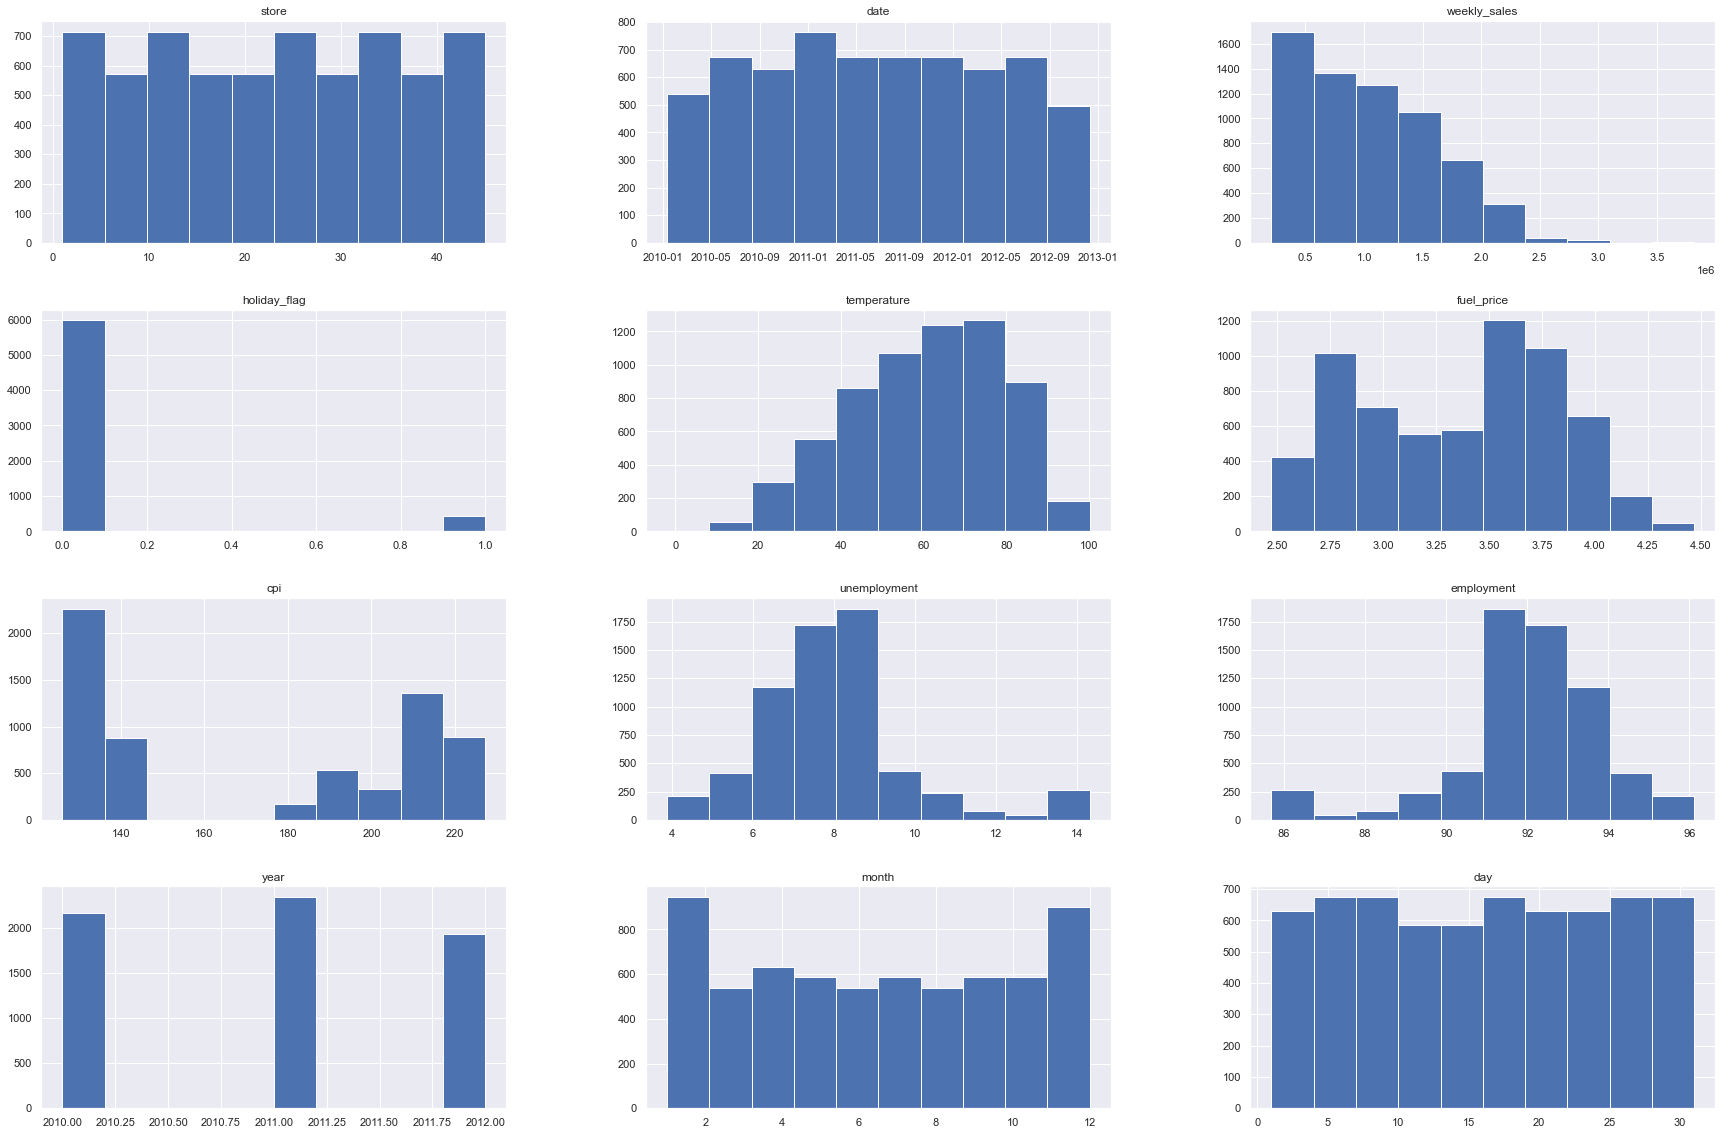

In [97]:
# histogram
sales.hist(figsize=(30,20))
plt.show()

In [ ]:
# the number of transactions occurred almost evenly across various stores and years.
# The distribution of weekly_sales right-skewed. 
# The distribution of temperature is approximately normal.
# The distribution of fuel_price is bi-modal.
# CPI formed two clusters.
# unemployment rate is near normally distributed.
# Four consecutive months November-February recorded the highest sales.

In [109]:
pivot_table=sales.pivot_table(index="month",columns="year",values="weekly_sales")
pivot_table

year,2010,2011,2012
month,,,
1,9.386639e+05,9.420697e+05,9.567817e+05
2,1.064372e+06,1.042273e+06,1.057997e+06
3,1.034590e+06,1.011263e+06,1.025510e+06
4,1.021177e+06,1.033220e+06,1.014127e+06
5,1.039303e+06,1.015565e+06,1.053948e+06
6,1.055082e+06,1.038471e+06,1.082920e+06
7,1.023702e+06,9.976049e+05,1.025480e+06
8,1.025212e+06,1.044895e+06,1.064514e+06
9,9.983559e+05,1.026810e+06,9.988663e+05


In [113]:
sales.weekly_sales/1e6 # 1643690.90

0       1.643691
1       1.641957
2       1.611968
3       1.409728
4       1.554807
          ...   
6430    0.713174
6431    0.733455
6432    0.734464
6433    0.718126
6434    0.760281
Name: weekly_sales, Length: 6435, dtype: float64

In [114]:
sales.weekly_sales

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: weekly_sales, Length: 6435, dtype: float64

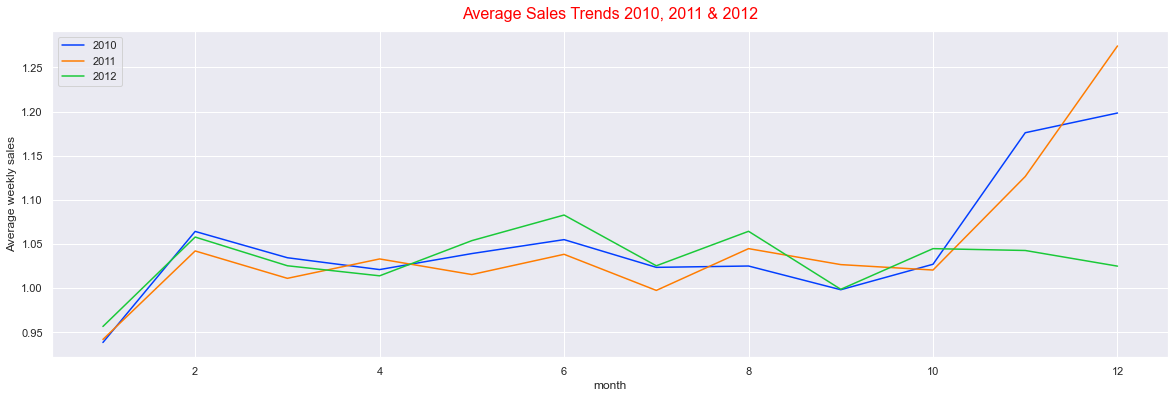

In [108]:
# plot the average sales
fig, ax = plt.subplots(figsize=(20, 6))
sns.set_palette("bright")
sns.lineplot(x=pivot_table.index, y=pivot_table[2010]/1e6, ax=ax, label='2010')
sns.lineplot( x=pivot_table.index, y=pivot_table[2011]/1e6, ax=ax, label='2011')
sns.lineplot( x=pivot_table.index, y=pivot_table[2012]/1e6, ax=ax, label='2012')
plt.ylabel("Average weekly sales")
plt.title("Average Sales Trends 2010, 2011 & 2012", fontdict ={"fontsize":16,
                                                                   "color":"red",
                                                                   "horizontalalignment": "center"},
                                                                   pad=12)
# Add a legend
plt.legend()
plt.show()

In [110]:
#assign
non_holiday_sales = sales[sales["holiday_flag"] == 0]
holiday_sales = sales[sales["holiday_flag"] == 1]

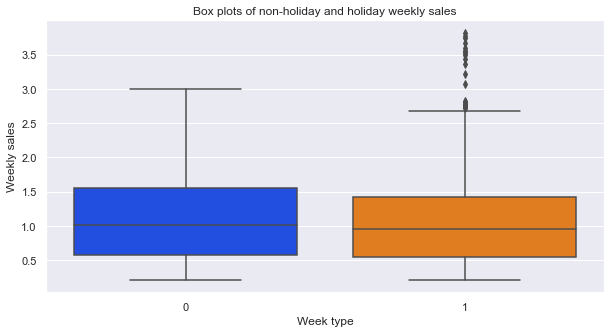

In [115]:
# plot box plots of non-holiday and holiday weekly sales 
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[holiday_sales["weekly_sales"]/1e6, non_holiday_sales["weekly_sales"]/1e6])
plt.ylabel("Weekly sales")
plt.xlabel('Week type')
plt.title('Box plots of non-holiday and holiday weekly sales')
plt.show()

In [ ]:
# Bigger Sales Happen In Holiday weeks

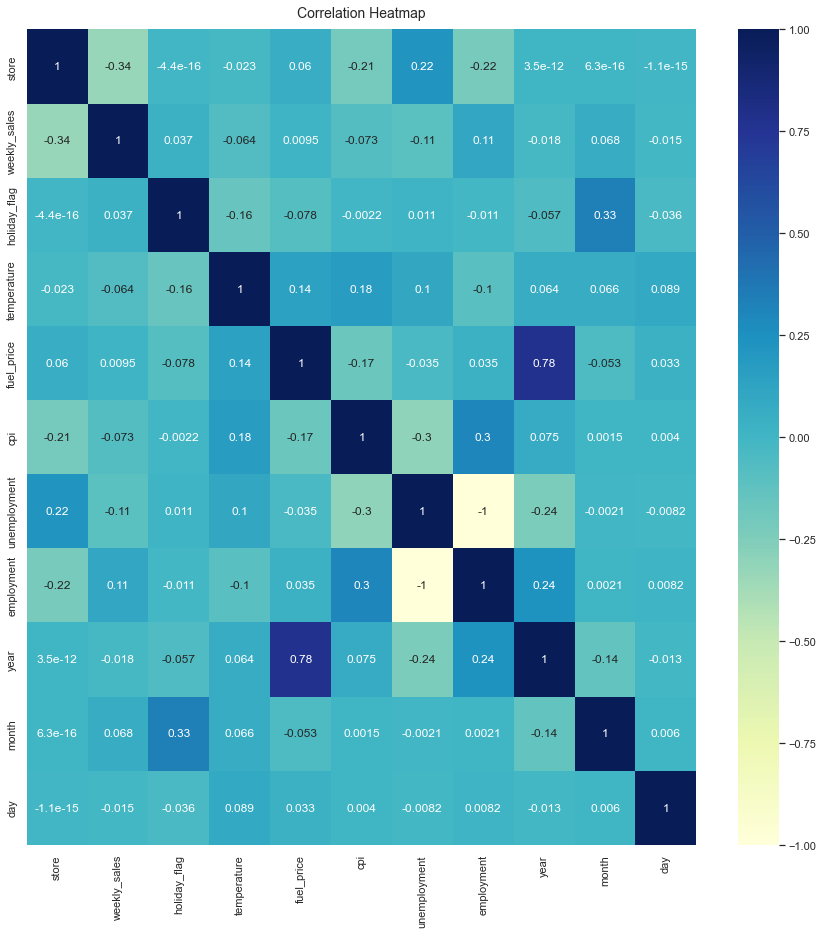

In [116]:
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(sales.corr(), vmin=-1, vmax=1, annot=True, cmap ="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
### Employment Is stromgest Corelation

In [117]:
sales_copy=sales.copy()

In [122]:
sales_copy.columns

Index(['store', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'cpi', 'employment', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
sales_copy.drop(["date","unemployment"], axis=1,inplace=True)


In [123]:
sales_copy.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,employment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,91.894,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,91.894,2010,5,3


In [124]:
x=sales_copy.drop("weekly_sales",axis=1)
y=sales_copy["weekly_sales"]

In [125]:
x

,store,holiday_flag,temperature,fuel_price,cpi,employment,year,month,day
0,1,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,0,39.93,2.514,211.289143,91.894,2010,2,19
3,1,0,46.63,2.561,211.319643,91.894,2010,2,26
4,1,0,46.50,2.625,211.350143,91.894,2010,5,3
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,91.316,2012,9,28
6431,45,0,64.89,3.985,192.170412,91.333,2012,5,10
6432,45,0,54.47,4.000,192.327265,91.333,2012,12,10
6433,45,0,56.47,3.969,192.330854,91.333,2012,10,19


In [126]:
y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: weekly_sales, Length: 6435, dtype: float64

In [127]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [ ]:
# split in dependent and independent variable

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y, test_size=0.2,random_state=141)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5148, 9)
(1287, 9)
(5148,)
(1287,)


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [144]:
from sklearn import metrics

In [141]:
lr=LinearRegression()
lr1=lr.fit(x_train,y_train)
lr1

LinearRegression()

In [142]:
y_pred_lr=lr1.predict(x_test)

In [145]:
r2=metrics.r2_score(y_test,y_pred_lr)
MAE=metrics.mean_absolute_error(y_test,y_pred_lr)
MSE=metrics.mean_squared_error(y_test,y_pred_lr)
RMSE=np.sqrt(MSE)


print("r2: ",r2)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RRMSE: ",r2)

r2:  0.1317978427646056
MAE:  432109.0950798647
MSE:  280773996752.46027
RRMSE:  0.1317978427646056


In [146]:
knn=KNeighborsRegressor()
knn1=knn.fit(x_train,y_train)
knn1

KNeighborsRegressor()

In [147]:
y_pred_knn=knn1.predict(x_test)

In [148]:
r2=metrics.r2_score(y_test,y_pred_knn)
MAE=metrics.mean_absolute_error(y_test,y_pred_knn)
MSE=metrics.mean_squared_error(y_test,y_pred_knn)
RMSE=np.sqrt(MSE)


print("r2: ",r2)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RRMSE: ",r2)

r2:  0.31416579011257206
MAE:  365058.2929526029
MSE:  221796744703.83646
RRMSE:  0.31416579011257206


In [149]:
rid=Ridge()
rid1=rid.fit(x_train,y_train)
rid1

Ridge()

In [150]:
y_pred_rid=rid1.predict(x_test)

In [151]:
r2=metrics.r2_score(y_test,y_pred_rid)
MAE=metrics.mean_absolute_error(y_test,y_pred_rid)
MSE=metrics.mean_squared_error(y_test,y_pred_rid)
RMSE=np.sqrt(MSE)


print("r2: ",r2)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RRMSE: ",r2)

r2:  0.13179949025461402
MAE:  432109.54661278345
MSE:  280773463959.089
RRMSE:  0.13179949025461402


In [152]:
las=Lasso()
las1=las.fit(x_train,y_train)
las1

Lasso()

In [156]:
y_pred_las=las1.predict(x_test)

In [157]:
r2=metrics.r2_score(y_test,y_pred_las)
MAE=metrics.mean_absolute_error(y_test,y_pred_las)
MSE=metrics.mean_squared_error(y_test,y_pred_las)
RMSE=np.sqrt(MSE)


print("r2: ",r2)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RRMSE: ",r2)

r2:  0.13179763105386855
MAE:  432109.00893593713
MSE:  280774065219.0833
RRMSE:  0.13179763105386855


In [158]:
dt=DecisionTreeRegressor()
dt1=dt.fit(x_train,y_train)
dt1

DecisionTreeRegressor()

In [159]:
y_pred_dt=dt1.predict(x_test)

In [161]:
r2=metrics.r2_score(y_test,y_pred_dt)
MAE=metrics.mean_absolute_error(y_test,y_pred_dt)
MSE=metrics.mean_squared_error(y_test,y_pred_dt)
RMSE=np.sqrt(MSE)


print("r2: ",r2)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RRMSE: ",r2)

r2:  0.937285698163625
MAE:  77009.13808857808
MSE:  20281618783.590515
RRMSE:  0.937285698163625


In [162]:
rf=RandomForestRegressor()
rf1=rf.fit(x_train,y_train)
rf1

RandomForestRegressor()

In [163]:
y_pred_rf=rf1.predict(x_test)

In [164]:
r2=metrics.r2_score(y_test,y_pred_rf)
MAE=metrics.mean_absolute_error(y_test,y_pred_rf)
MSE=metrics.mean_squared_error(y_test,y_pred_rf)
RMSE=np.sqrt(MSE)


print("r2: ",r2)
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RRMSE: ",r2)

r2:  0.9576696931793357
MAE:  64491.982060528346
MSE:  13689495390.845264
RRMSE:  0.9576696931793357


### USING ETL PIPELINE

In [229]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.decomposition import PCA

In [167]:
df=pd.read_csv("Walmart.csv")

In [168]:
df.head(3)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [170]:
df["Date"] = pd.to_datetime(df.Date)

In [173]:
df.columns=[col.lower()for col in df.columns]

In [174]:
df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [175]:
df["employment"] = 100 - df["unemployment"]

# split the date column
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day

df.head(3)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,employment,year,month,day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,91.894,2010,5,2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,91.894,2010,12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,91.894,2010,2,19


In [176]:
df.drop(["date","unemployment"], axis=1,inplace=True)

In [177]:
df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,employment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,91.894,2010,5,2
1,1,1641957.44,1,38.51,2.548,211.242170,91.894,2010,12,2
2,1,1611968.17,0,39.93,2.514,211.289143,91.894,2010,2,19
3,1,1409727.59,0,46.63,2.561,211.319643,91.894,2010,2,26
4,1,1554806.68,0,46.50,2.625,211.350143,91.894,2010,5,3


In [178]:
x=df.drop(["weekly_sales"],axis=1)
y=df["weekly_sales"]

In [219]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5148, 9)
(1287, 9)
(5148,)
(1287,)


In [180]:
df.columns

Index(['store', 'weekly_sales', 'holiday_flag', 'temperature', 'fuel_price',
       'cpi', 'employment', 'year', 'month', 'day'],
      dtype='object')

In [220]:
#Scaling
trf1=ColumnTransformer([
    "Scale",MinMaxScaler(),slice(0,10)
],remainder="passthrough")

In [230]:
#feature Selection
trf2=PCA(n_components=5)

In [239]:
trf3=DecisionTreeRegressor(random_state=1)

In [240]:
trf4=RandomForestRegressor()

In [241]:
trf5=KNeighborsRegressor()

In [242]:
trf6=Ridge()

In [243]:
trf7=Lasso()

## Pipeline

In [244]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",trf4),
    ("trf5",trf5),
    ("trf6",trf6),
    ("trf7",trf7)
])

In [245]:
pipe.fit(x_train,y_train)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'DecisionTreeRegressor(random_state=1)' (type <class 'sklearn.tree._classes.DecisionTreeRegressor'>) doesn't